# Word2Vec.jl

In [1]:
using Word2Vec

## Training

Three functions are available for traning:

 * ``word2vec``
 * ``word2phrase``
 * ``word2cluster``

We first download a text corpus:  http://mattmahoney.net/dc/text8.zip and unzip it.

All functions are documented, i.e., we can type ``?functionname`` to check input options. 

In [2]:
?word2vec

search: 

`word2vec(train, output; size=100, window=5, sample=1e-3, hs=0,  negative=5, threads=12, iter=5, min_count=5, alpha=0.025, debug=2, binary=1, cbow=1, save_vocal=Void(), read_vocab=Void(), verbose=false,)`

```
Parameters for training:
    train <file>
        Use text data from <file> to train the model
    output <file>
        Use <file> to save the resulting word vectors / word clusters
    size <Int>
        Set size of word vectors; default is 100
    window <Int>
        Set max skip length between words; default is 5
    sample <AbstractFloat>
        Set threshold for occurrence of words. Those that appear with
        higher frequency in the training data will be randomly
        down-sampled; default is 1e-5.
    hs <Int>
        Use Hierarchical Softmax; default is 1 (0 = not used)
    negative <Int>
        Number of negative examples; default is 0, common values are 
        5 - 10 (0 = not used)
    threads <Int>
        Use <Int> threads (default 12)
    iter <Int>
        Run more training iterations (default 5)
    min_count <Int>
        This will discard words that appear less than <Int> times; default
        is 5
    alpha <AbstractFloat>
        Set the starting learning rate; default is 0.025
    debug <Int>
        Set the debug mode (default = 2 = more info during training)
    binary <Int>
        Save the resulting vectors in binary moded; default is 0 (off)
    cbow <Int>
        Use the continuous back of words model; default is 1 (skip-gram
        model)
    save_vocab <file>
        The vocabulary will be saved to <file>
    read_vocab <file>
        The vocabulary will be read from <file>, not constructed from the
        training data
    verbose <Bool>
        Print output from training
```


word2vec Word2Vec



In [4]:
word2vec("Downloads/text8", "text8-vec.txt", verbose=true)

Starting training using file Downloads/text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000002  Progress: 100.03%  Words/thread/sec: 356.11k  

This will create a text file ``text8-vec.txt`` where each word in ``text8``
is represented by a vector. In certain applications, we want to have vector
representation of larger piece of text. For example, instead of considering ``"san"`` and ``"francisco"`` as two words, we want to have a vector to represent ``"san francisco"``. This can be achieved by pre-processing the text corpus with the function ``word2phrase``.

In [29]:
word2phrase("Downloads/text8", "text8phrase")
word2vec("text8phrase", "text8phrase-vec.txt", verbose=true)

Starting training using file Downloads/text8

Vocab size (unigrams + bigrams): 2419827
Words in train file: 17005206
Starting training using file text8phrase
Vocab size: 98331
Words in train file: 15857306
Alpha: 0.000002  Progress: 100.03%  Words/thread/sec: 341.90k  

`word2clusters` gives each word a class ID number.

In [22]:
word2clusters("text8", "text8-class.txt", 100)

Starting training using file text8
Vocab size: 71291
Words in train file: 16718843
Alpha: 0.000006  Progress: 99.99%  Words/thread/sec: 382.50k  

## Modelling 

In [25]:
;ls

text8
text8-class.txt
text8phrase
text8phrase-vec.txt
text8-vec.txt
text8.zip


In [4]:
model = wordvectors("text8-vec.txt")

WordVectors 71291 words, 100-element Float64 vectors

Here are some basic functionalities.

In [26]:
size(model)

(100,71291)

In [7]:
words = vocabulary(model)

71291-element Array{AbstractString,1}:
 "</s>"        
 "the"         
 "of"          
 "and"         
 "one"         
 "in"          
 "a"           
 "to"          
 "zero"        
 "nine"        
 "two"         
 "is"          
 "as"          
 ⋮             
 "raam"        
 "barad"       
 "baume"       
 "mothmen"     
 "gallopin"    
 "horsecollar" 
 "mojitos"     
 "snaggletooth"
 "introvigne"  
 "denishawn"   
 "tamiris"     
 "dolophine"   

In [36]:
idx = index(model, "book")

199

In [37]:
words[idx]

"book"

We can retrieve the vector representation of individual words and compute the cosine distance between two words.

In [6]:
get_vector(model, "one")

100-element Array{Float64,1}:
 -0.00124171 
 -0.153338   
  0.102503   
  0.0189016  
  0.0481557  
 -0.017203   
 -0.0345992  
 -0.143795   
  0.13964    
  0.10404    
  0.0987664  
  0.000247274
 -0.0294016  
  ⋮          
 -0.0729129  
  0.00609002 
 -0.115113   
 -0.1635     
  0.104623   
 -0.0815325  
 -0.0979441  
 -0.0522775  
 -0.0893822  
  0.121403   
 -0.0100501  
  0.100918   

In [7]:
similarity(model, "one", "two")

1-element Array{Float64,1}:
 0.795706

In [8]:
similarity(model, "one", "hello")

1-element Array{Float64,1}:
 0.000406437

The funciton ``cosine(model, word, n)`` return the indices and distances
of `n` neighbors of ``word``.

In [5]:
idxs, dists = cosine(model, "paris", 10)

([1056,5356,3222,6964,4611,9122,4219,4218,12359,15749],[0.9999999999999999,0.7663500088541577,0.754464599846764,0.7269210839899815,0.6949826015235541,0.6906811525014919,0.6899940820154246,0.6874193547947338,0.6820260362215733,0.6817421670970778])

We can use ``Gadfly`` to plot the top 10 similar words to ``"paris"`` 

In [3]:
using Gadfly

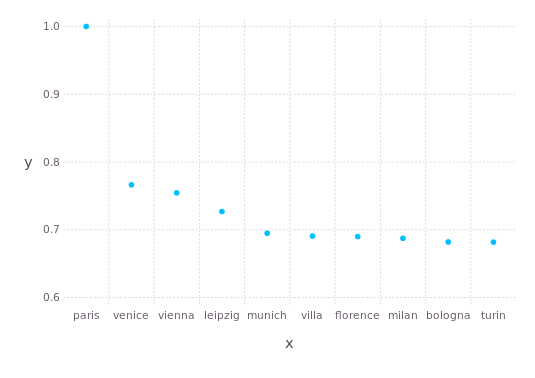

In [8]:
plot(x=words[idxs], y=dists)

In [12]:
?analogy

search: 

`analogy(wv, pos, neg, n=5)`

Compute the analogy similarity between two lists of words. The positions and the similarity values of the top `n` similar words will be returned.  For example,  `king - man + woman = queen` will be  `pos=["king", "woman"], neg=["man"]`.


analogy analogy_words



In [10]:
indxs, dists = analogy(model, ["king", "woman"], ["man"], 8)

([904,6854,1062,2033,527,12269,2076,3422],[0.29024117726721255,0.26277586168028433,0.253278904324895,0.25208853175214935,0.24775773633691375,0.24558402441677105,0.24309061947916874,0.2418303817434562])

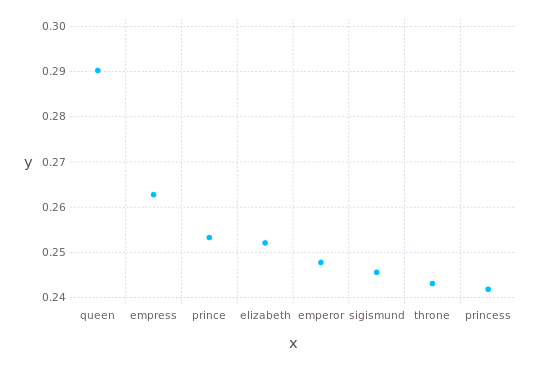

In [11]:
plot(x=words[indxs], y=dists)

``analogy_words`` is a wrapper of ``analogy``.

In [13]:
?analogy_words

search: 

`analogy_words(wv, pos, neg, n=5)`

Return the top `n` words computed by analogy similarity between positive words `pos` and negaive words `neg`. from the WordVectors `wv`. 


analogy_words



In [23]:
analogy_words(model, ["paris", "germany"], ["france"], 10)

10-element Array{AbstractString,1}:
 "berlin"    
 "munich"    
 "leipzig"   
 "vienna"    
 "bonn"      
 "dresden"   
 "hamburg"   
 "stuttgart" 
 "frankfurt" 
 "heidelberg"

In [30]:
model2 = wordvectors("text8phrase-vec.txt")

WordVectors 98331 words, 100-element Float64 vectors

``model2`` is pre-processed by ``word2phrase``, so we can compute the similar words of phrases.

In [32]:
cosine_similar_words(model2, "los_angeles", 13)

13-element Array{AbstractString,1}:
 "los_angeles"  
 "san_francisco"
 "san_diego"    
 "miami"        
 "las_vegas"    
 "seattle"      
 "cincinnati"   
 "cleveland"    
 "st_louis"     
 "california"   
 "chicago"      
 "dallas"       
 "atlanta"      

## Clustering

In [61]:
model3 = wordclusters("text8-class.txt")

WordClusters 71291 words, 100 clusters

The function ``clusters`` returns all the clusters in a model. 

In [62]:
clusters(model3)

100-element Array{Integer,1}:
  0
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
 11
 12
  ⋮
 88
 89
 90
 91
 92
 93
 94
 95
 96
 97
 98
 99

We can use ``get_cluster`` to retrieve the cluster ID of a given word and use ``get_words`` to retrieve all the words
of a given cluster ID.

In [65]:
get_cluster(model3, "two")

39

In [66]:
get_words(model3, 39)

116-element Array{AbstractString,1}:
 "one"          
 "zero"         
 "nine"         
 "two"          
 "eight"        
 "five"         
 "three"        
 "four"         
 "six"          
 "seven"        
 "years"        
 "th"           
 "century"      
 ⋮              
 "interceptions"
 "nisan"        
 "weekday"      
 "ramadan"      
 "weekdays"     
 "workday"      
 "thirtieth"    
 "lunations"    
 "graders"      
 "goodwrench"   
 "spoked"       
 "rublei"       